In [114]:
library(ggplot2)
library(ggdist)
library(patchwork)
library(tidyr)
library(dplyr)

In [115]:
# Load data
data <- read.csv("data/fullResults.csv", header=T)

data <- data %>%
  mutate(anchor = ifelse(anchorCategory == "anchor", "anchor", "non-anchor"))

data <- data %>%
  mutate(alignment = ifelse(alignmentCategory == "aligned", "aligned", "unaligned"))

data <- data %>%
  mutate(anchorType = case_when(
    selectedPart == 25 ~ "25",
    selectedPart == 50 ~ "50",
    TRUE ~ "non-anchor"
))

data$alignmentCategory <- factor(data$alignmentCategory, levels = c("aligned", "near-aligned", "far-from-aligned"))
data$anchorCategory <- factor(data$anchorCategory, levels = c("anchor", "near-anchor", "far-anchor"))
data$chartType <- factor(data$chartType, levels = c("pie", "line"))

data$distToNearest5 <- abs(data$selectedPart - round(data$selectedPart / 5) * 5)
data$distToNearest10 <- abs(data$selectedPart - round(data$selectedPart / 10) * 10)

blue <- "#336199"
lightblue <- "#5688C7"
red <- "#E74236"
lightred <- "#EE766D"
green <- "#00A35F"
lightgreen <- "#0ACC7B"

breaksAbsError <- seq(floor(min(data$absError)) - 0.5, ceiling(max(data$absError)) + 0.5, by = 1)
lisAbsError <- c(-0.5, 11.5)
size <- 0.5
baseSize = 20

In [116]:
# --- Summarize per-user means ---
userMeans <- data %>%
  group_by(userID, chartType) %>%
  summarise(
    meanAbsError = mean(absError, na.rm = TRUE),
    .groups = "drop"
  )

# --- Summarize overall means and 95% confidence intervals ---
overallMeans <- userMeans %>%
  group_by(chartType) %>%
  summarise(
    overallMean = mean(meanAbsError, na.rm = TRUE),
    se = sd(meanAbsError, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low = overallMean - 1.96 * se,
    ci_high = overallMean + 1.96 * se
  )

# --- Reshape for parallel coordinates plot ---
wide_data <- userMeans %>%
  pivot_wider(names_from = chartType, values_from = meanAbsError)

long_data <- wide_data %>%
  pivot_longer(cols = -userID, names_to = "chartType", values_to = "meanAbsError")

# --- Set consistent factor levels ---
chart_levels <- unique(long_data$chartType)
long_data$chartType <- factor(long_data$chartType, levels = chart_levels)
overallMeans$chartType <- factor(overallMeans$chartType, levels = chart_levels)

# --- Plot ---
chartTypePlot <- ggplot(long_data, aes(x = chartType, y = meanAbsError, group = userID)) +
  coord_cartesian(ylim = c(0, 7)) +

  # Per-user trajectories
  geom_line(alpha = 0.2, color = blue) +
  geom_point(alpha = 0.2, color = blue) +

  # 95% confidence interval ribbon
  geom_ribbon(
    data = overallMeans,
    aes(x = chartType, ymin = ci_low, ymax = ci_high, group = 1),
    fill = green, alpha = 0.2,
    inherit.aes = FALSE
  ) +

  # Overall mean line and points
  geom_line(
    data = overallMeans,
    aes(x = chartType, y = overallMean, group = 1),
    color = green, linewidth = 1.2,
    inherit.aes = FALSE
  ) +
  geom_point(
    data = overallMeans,
    aes(x = chartType, y = overallMean),
    color = green, size = 3,
    inherit.aes = FALSE
  ) +

  theme_minimal(base_size = baseSize) +
  labs(
    title = "Chart Type",
    x = "Chart Type",
    y = "Predicted Mean Absolute Error"
  )


In [117]:
# --- Summarize per-user means ---
userMeans <- data %>%
  group_by(userID, alignment) %>%
  summarise(
    meanAbsError = mean(absError, na.rm = TRUE),
    .groups = "drop"
  )

# --- Summarize overall means and 95% confidence intervals ---
overallMeans <- userMeans %>%
  group_by(alignment) %>%
  summarise(
    overallMean = mean(meanAbsError, na.rm = TRUE),
    se = sd(meanAbsError, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low = overallMean - 1.96 * se,
    ci_high = overallMean + 1.96 * se
  )

# --- Reshape for parallel coordinates plot ---
wide_data <- userMeans %>%
  pivot_wider(names_from = alignment, values_from = meanAbsError)

long_data <- wide_data %>%
  pivot_longer(cols = -userID, names_to = "alignment", values_to = "meanAbsError")

# --- Set consistent factor levels ---
alignment_levels <- unique(long_data$alignment)
long_data$alignment <- factor(long_data$alignment, levels = alignment_levels)
overallMeans$alignment <- factor(overallMeans$alignment, levels = alignment_levels)

# --- Plot ---
alignmentPlot <- ggplot(long_data, aes(x = alignment, y = meanAbsError, group = userID)) +
  coord_cartesian(ylim = c(0, 7)) +

  # Per-user trajectories
  geom_line(alpha = 0.2, color = blue) +
  geom_point(alpha = 0.2, color = blue) +

  # 95% confidence interval ribbon
  geom_ribbon(
    data = overallMeans,
    aes(x = alignment, ymin = ci_low, ymax = ci_high, group = 1),
    fill = green, alpha = 0.2,
    inherit.aes = FALSE
  ) +

  # Overall mean line and points
  geom_line(
    data = overallMeans,
    aes(x = alignment, y = overallMean, group = 1),
    color = green, linewidth = 1.2,
    inherit.aes = FALSE
  ) +
  geom_point(
    data = overallMeans,
    aes(x = alignment, y = overallMean),
    color = green, size = 3,
    inherit.aes = FALSE
  ) +

  theme_minimal(base_size = baseSize) +
  labs(
    title = "Alignment",
    x = "Alignment",
    y = "Predicted Mean Absolute Error"
  )

In [118]:
# --- Summarize per-user means ---
userMeans <- data %>%
  group_by(userID, anchor) %>%
  summarise(
    meanAbsError = mean(absError, na.rm = TRUE),
    .groups = "drop"
  )

# --- Summarize overall means and 95% confidence intervals ---
overallMeans <- userMeans %>%
  group_by(anchor) %>%
  summarise(
    overallMean = mean(meanAbsError, na.rm = TRUE),
    se = sd(meanAbsError, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low = overallMean - 1.96 * se,
    ci_high = overallMean + 1.96 * se
  )

# --- Reshape for parallel coordinates plot ---
wide_data <- userMeans %>%
  pivot_wider(names_from = anchor, values_from = meanAbsError)

long_data <- wide_data %>%
  pivot_longer(cols = -userID, names_to = "anchor", values_to = "meanAbsError")

# --- Set consistent factor levels ---
anchor_levels <- unique(long_data$anchor)
long_data$anchor <- factor(long_data$anchor, levels = anchor_levels)
overallMeans$anchor <- factor(overallMeans$anchor, levels = anchor_levels)

# --- Plot ---
anchorPlot <- ggplot(long_data, aes(x = anchor, y = meanAbsError, group = userID)) +
  coord_cartesian(ylim = c(0, 7)) +
  
  # Per-user trajectories
  geom_line(alpha = 0.2, color = blue) +
  geom_point(alpha = 0.2, color = blue) +
  
  # 95% confidence interval ribbon
  geom_ribbon(
    data = overallMeans,
    aes(x = anchor, ymin = ci_low, ymax = ci_high, group = 1),
    fill = green, alpha = 0.2,
    inherit.aes = FALSE
  ) +

  # Overall mean line and points
  geom_line(
    data = overallMeans,
    aes(x = anchor, y = overallMean, group = 1),
    color = green, linewidth = 1.2,
    inherit.aes = FALSE
  ) +
  geom_point(
    data = overallMeans,
    aes(x = anchor, y = overallMean),
    color = green, size = 3,
    inherit.aes = FALSE
  ) +

  theme_minimal(base_size = baseSize) +
  labs(
    title = "Anchoring",
    x = "Anchoring",
    y = "Predicted Mean Absolute Error"
  )


In [119]:
# --- Step 1: Create interaction variable with line breaks first ---
data <- data %>%
  mutate(anchorAlignment = case_when(
    anchor == "anchor" & alignment == "aligned" ~ "anchor\naligned",
    anchor == "anchor" & alignment == "unaligned" ~ "anchor\nunaligned",
    anchor == "non-anchor" & alignment == "aligned" ~ "non-anchor\naligned",
    anchor == "non-anchor" & alignment == "unaligned" ~ "non-anchor\nunaligned"
  ))

# --- Step 2: Summarize per-user and overall means using the line-break labels ---
userMeans <- data %>%
  group_by(userID, anchorAlignment) %>%
  summarise(meanAbsError = mean(absError, na.rm = TRUE), .groups = "drop")

# Calculate overall mean, standard error, and 95% confidence interval
overallMeans <- userMeans %>%
  group_by(anchorAlignment) %>%
  summarise(
    overallMean = mean(meanAbsError, na.rm = TRUE),
    se = sd(meanAbsError, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low = overallMean - 1.96 * se,
    ci_high = overallMean + 1.96 * se
  )
# --- Step 3: Reshape for parallel coordinates ---
wide_data <- userMeans %>%
  pivot_wider(names_from = anchorAlignment, values_from = meanAbsError)

long_data <- wide_data %>%
  pivot_longer(cols = -userID, names_to = "anchorAlignment", values_to = "meanAbsError")

# --- Step 4: Set factor levels ---
anchorAlignment_levels <- c(
  "anchor\naligned", 
  "anchor\nunaligned", 
  "non-anchor\naligned", 
  "non-anchor\nunaligned"
)

long_data$anchorAlignment <- factor(long_data$anchorAlignment, levels = anchorAlignment_levels)
overallMeans$anchorAlignment <- factor(overallMeans$anchorAlignment, levels = anchorAlignment_levels)

# --- Step 5: Plot ---
interactionPlot <- ggplot(long_data, aes(x = anchorAlignment, y = meanAbsError, group = userID)) +
  coord_cartesian(ylim = c(0, 7)) +
  geom_line(alpha = 0.2, color = blue) +
  geom_point(alpha = 0.2, color = lightblue) +

  # 95% confidence interval ribbon
  geom_ribbon(data = overallMeans,
              aes(x = anchorAlignment, ymin = ci_low, ymax = ci_high, group = 1),
              fill = lightgreen, alpha = 0.2,
              inherit.aes = FALSE) +

  # Overall means
  geom_line(data = overallMeans,
            aes(x = anchorAlignment, y = overallMean, group = 1),
            color = green, linewidth = 1.2,
            inherit.aes = FALSE) +
  geom_point(data = overallMeans,
             aes(x = anchorAlignment, y = overallMean),
             color = green, size = 3,
             inherit.aes = FALSE) +

  theme_minimal(base_size = baseSize) +
  labs(
    title = "Anchoring × Alignment Interaction",
    x = "Condition",
    y = "Predicted Mean Absolute Error"
  )


pdf 
  2

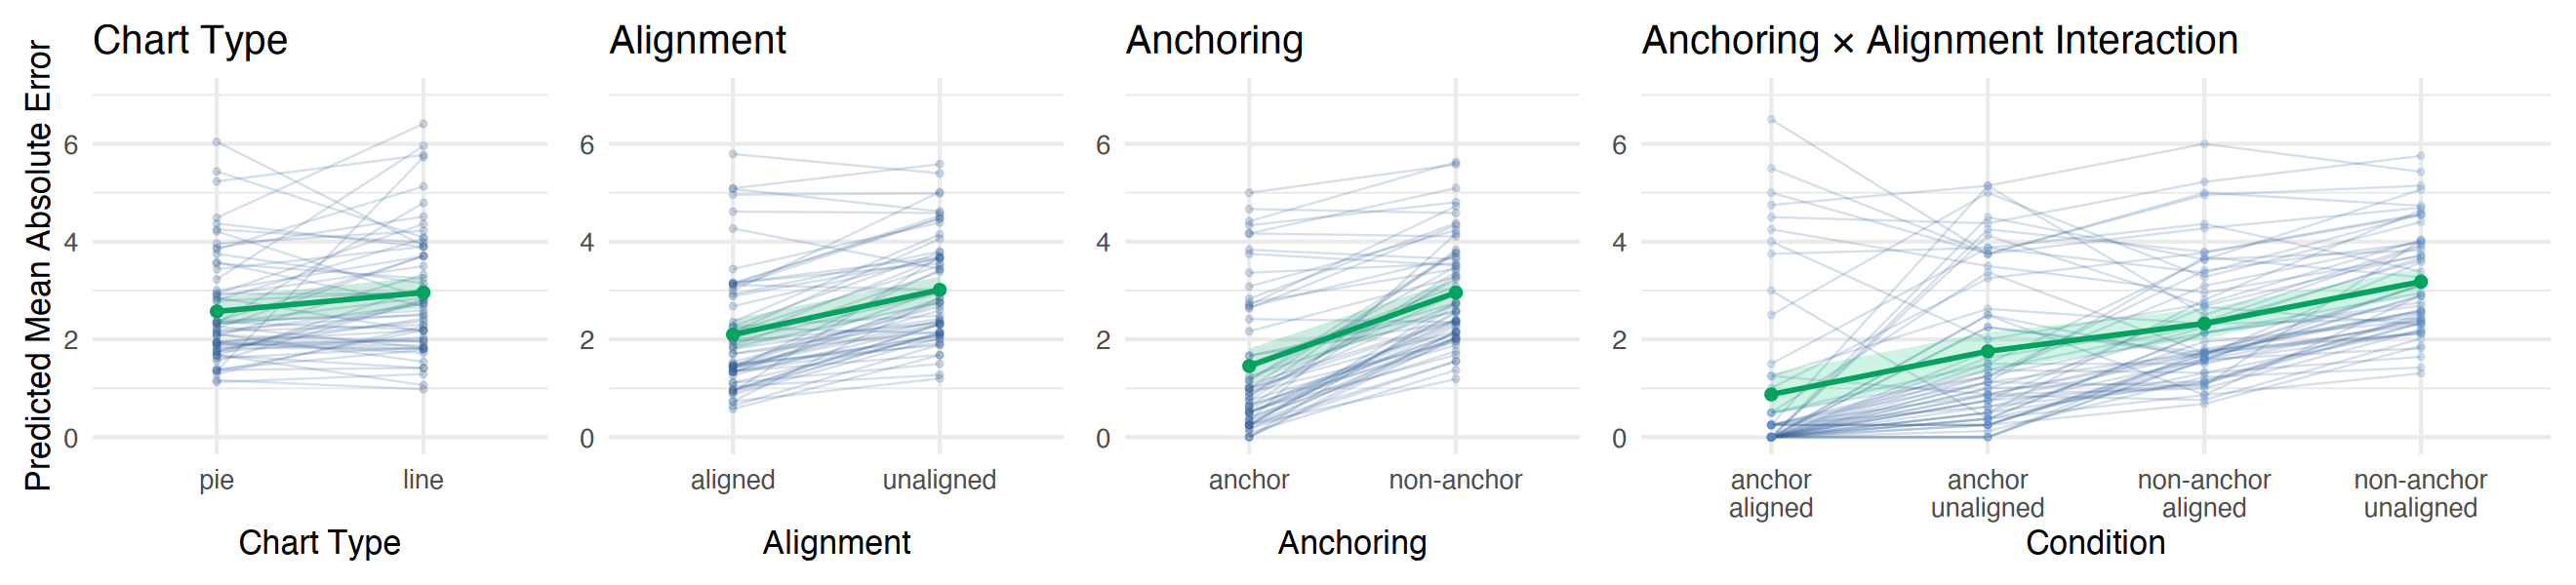

In [120]:
# Load libraries
library(Cairo)
library(ggplot2)
library(patchwork)

# Set size
width <- 22
height <- 5
options(repr.plot.width = width, repr.plot.height = height)

# Build the full plot
full_plot <- chartTypePlot + 
  alignmentPlot + 
  anchorPlot + 
  interactionPlot +
  plot_layout(
    ncol = 4,
    nrow = 1,
    guides = 'collect',
    axis_titles = "collect",
    widths = c(2, 2, 2, 4)
  )

# Open SVG device
Cairo::CairoSVG("modelplot.svg", width = width, height = height)

# Draw plot
print(full_plot)

# Close device
dev.off()

# Display in notebook (optional)
full_plot


In [121]:
# --- Summarize per-user means by anchorDistance ---
userMeans <- data %>%
  group_by(userID, anchorDistance) %>%
  summarise(
    meanAbsError = mean(absError, na.rm = TRUE),
    .groups = "drop"
  )

# --- Summarize overall means and 95% confidence intervals ---
overallMeans <- userMeans %>%
  group_by(anchorDistance) %>%
  summarise(
    overallMean = mean(meanAbsError, na.rm = TRUE),
    se = sd(meanAbsError, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low = overallMean - 1.96 * se,
    ci_high = overallMean + 1.96 * se
  )

# --- Reshape for plotting ---
wide_data <- userMeans %>%
  pivot_wider(names_from = anchorDistance, values_from = meanAbsError)

long_data <- wide_data %>%
  pivot_longer(cols = -userID, names_to = "anchorDistance", values_to = "meanAbsError")

# --- Ensure anchorDistance is numeric ---
long_data$anchorDistance <- as.integer(as.character(long_data$anchorDistance))
overallMeans$anchorDistance <- as.integer(as.character(overallMeans$anchorDistance))

# --- Plot ---
anchorDistancePlot <- ggplot(long_data, aes(x = anchorDistance, y = meanAbsError, group = userID)) +
  coord_cartesian(ylim = c(0, 10)) +

  # Per-user trajectories
  geom_line(alpha = 0.2, color = blue) +
  geom_point(alpha = 0.2, color = blue) +

  # 95% confidence interval ribbon
  geom_ribbon(
    data = overallMeans,
    aes(x = anchorDistance, ymin = ci_low, ymax = ci_high, group = 1),
    fill = green, alpha = 0.2,
    inherit.aes = FALSE
  ) +

  # Overall mean line and points
  geom_line(
    data = overallMeans,
    aes(x = anchorDistance, y = overallMean, group = 1),
    color = green, linewidth = 1.2,
    inherit.aes = FALSE
  ) +
  geom_point(
    data = overallMeans,
    aes(x = anchorDistance, y = overallMean),
    color = green, size = 3,
    inherit.aes = FALSE
  ) +

  scale_x_continuous(breaks = sort(unique(long_data$anchorDistance))) +  # Make sure ticks show all integer distances
  theme_minimal(base_size = baseSize) +
  labs(
    title = "Anchor Distance",
    x = "Anchor Distance",
    y = "Predicted Mean Absolute Error"
  )

In [122]:
# --- Summarize per-user means by alignmentDistance ---
userMeans <- data %>%
  group_by(userID, alignmentDistance) %>%
  summarise(
    meanAbsError = mean(absError, na.rm = TRUE),
    .groups = "drop"
  )

# --- Summarize overall means and 95% confidence intervals ---
overallMeans <- userMeans %>%
  group_by(alignmentDistance) %>%
  summarise(
    overallMean = mean(meanAbsError, na.rm = TRUE),
    se = sd(meanAbsError, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  mutate(
    ci_low = overallMean - 1.96 * se,
    ci_high = overallMean + 1.96 * se
  )

# --- Reshape for plotting ---
wide_data <- userMeans %>%
  pivot_wider(names_from = alignmentDistance, values_from = meanAbsError)

long_data <- wide_data %>%
  pivot_longer(cols = -userID, names_to = "alignmentDistance", values_to = "meanAbsError")

# --- Ensure alignmentDistance is numeric ---
long_data$alignmentDistance <- as.integer(as.character(long_data$alignmentDistance))
overallMeans$alignmentDistance <- as.integer(as.character(overallMeans$alignmentDistance))

# --- Plot ---
alignmentDistancePlot <- ggplot(long_data, aes(x = alignmentDistance, y = meanAbsError, group = userID)) +
  coord_cartesian(ylim = c(0, 10)) +

  # Per-user trajectories
  geom_line(alpha = 0.2, color = blue) +
  geom_point(alpha = 0.2, color = blue) +

  # 95% confidence interval ribbon
  geom_ribbon(
    data = overallMeans,
    aes(x = alignmentDistance, ymin = ci_low, ymax = ci_high, group = 1),
    fill = green, alpha = 0.2,
    inherit.aes = FALSE
  ) +

  # Overall mean line and points
  geom_line(
    data = overallMeans,
    aes(x = alignmentDistance, y = overallMean, group = 1),
    color = green, linewidth = 1.2,
    inherit.aes = FALSE
  ) +
  geom_point(
    data = overallMeans,
    aes(x = alignmentDistance, y = overallMean),
    color = green, size = 3,
    inherit.aes = FALSE
  ) +

  scale_x_continuous(breaks = sort(unique(long_data$alignmentDistance))) +  # Force all distances to show
  theme_minimal(base_size = baseSize) +
  labs(
    title = "Alignment Distance",
    x = "Alignment Distance",
    y = "Predicted Mean Absolute Error"
  )


Warning message:
“Removed 31 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


pdf 
  2

Warning message:
“Removed 31 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


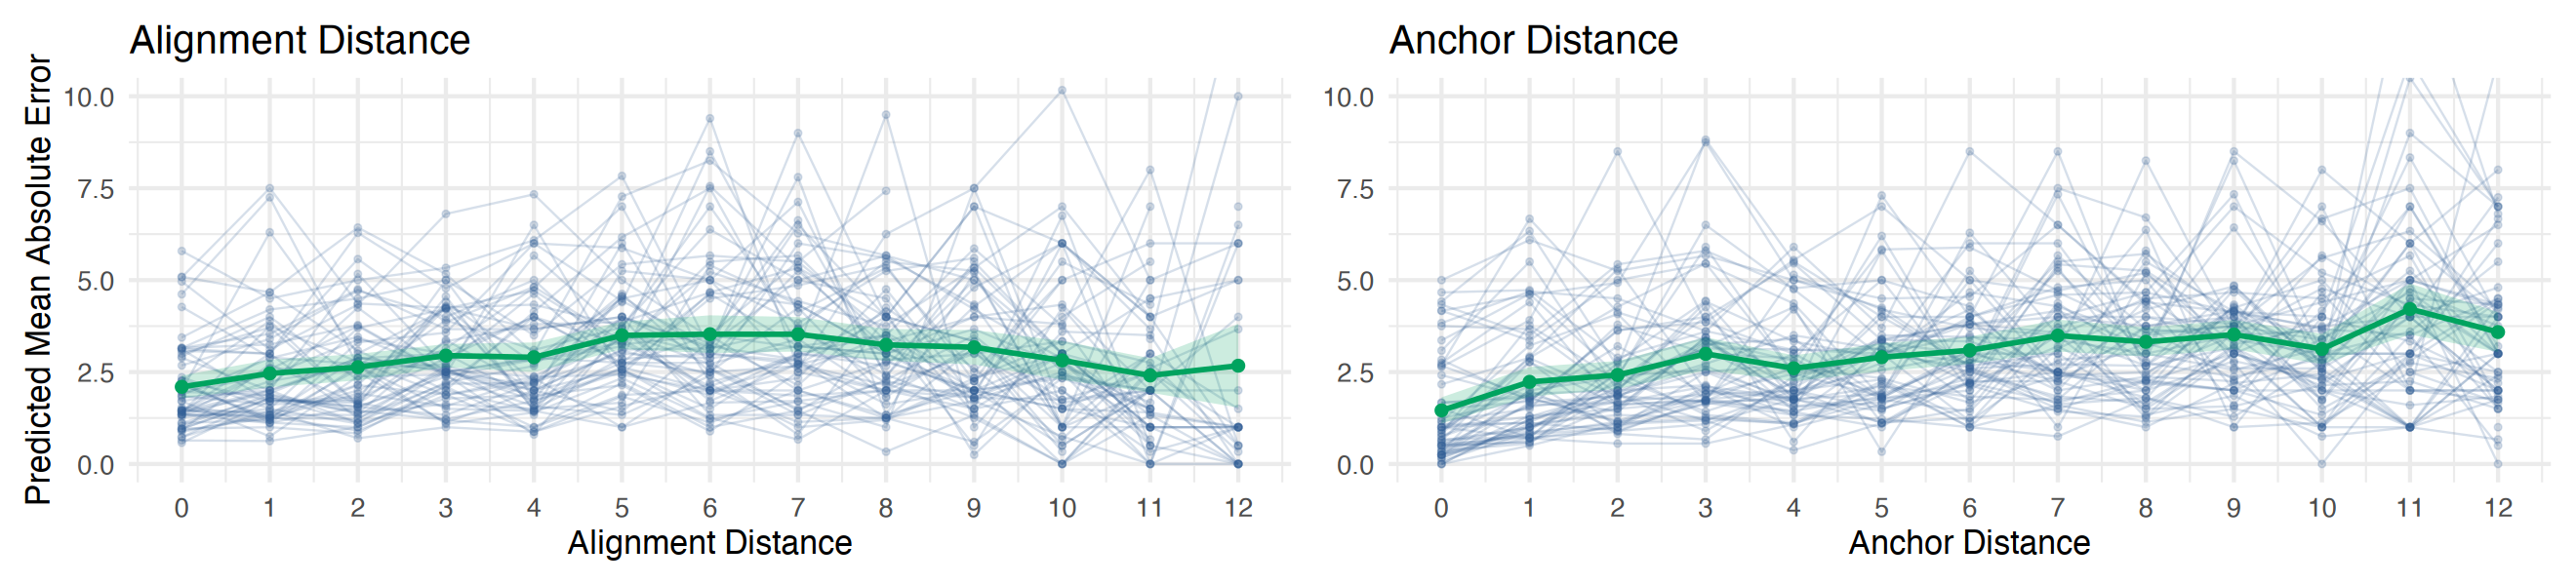

In [123]:
# Set size
width <- 22
height <- 5
options(repr.plot.width = width, repr.plot.height = height)

# Build the full plot
full_plot <- alignmentDistancePlot + 
  anchorDistancePlot + 
  plot_layout(
    ncol = 2,
    nrow = 1,
    guides = 'collect',
    axis_titles = "collect",
    widths = c(2, 2, 2, 4)
  )

# Open SVG device
Cairo::CairoSVG("distanceplot.svg", width = width, height = height)

# Draw plot
print(full_plot)

# Close device
dev.off()

# Display in notebook (optional)
full_plot


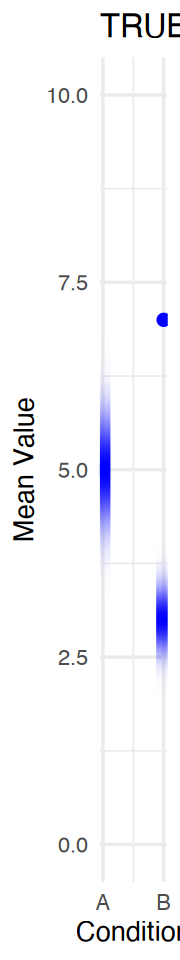

In [124]:
# Parameters
n_y <- 500  # number of vertical pixels
n_x <- 10   # small width across x

make_vertical_gradient <- function(mean_val, se_val, y_range = c(0, 10), n_y = 500) {
  y_seq <- seq(y_range[1], y_range[2], length.out = n_y)
  alpha_vals <- dnorm(y_seq, mean = mean_val, sd = se_val)
  alpha_vals <- alpha_vals / max(alpha_vals)  # normalize to [0,1]
  
  # Make a matrix: n_y rows, n_x columns
  matrix(rep(alpha_vals, each = n_x), nrow = n_y, byrow = TRUE)
}

library(grid)

create_rasterGrob <- function(alpha_matrix, color = "blue") {
  # Create RGB arrays
  rgb_color <- col2rgb(color) / 255
  img <- array(0, dim = c(dim(alpha_matrix), 4))  # 4 channels (RGBA)
  
  img[,,1] <- rgb_color[1]
  img[,,2] <- rgb_color[2]
  img[,,3] <- rgb_color[3]
  img[,,4] <- alpha_matrix  # alpha
  
  # Convert to raster
  rasterGrob(img, interpolate = TRUE)
}

# Example data
means <- data.frame(
  condition = c("A", "B"),
  x = c(1, 2),
  mean = c(5, 7),
  se = c(0.5, 0.3)
)

# Plot
p <- ggplot(means, aes(x = x, y = mean)) +
  geom_point(size = 3, color = "blue") +
  scale_x_continuous(breaks = means$x, labels = means$condition) +
  theme_minimal(base_size = 16) +
  labs(
    x = "Condition",
    y = "Mean Value",
    title = "TRUE Smooth Gradient for Means"
  ) +
  coord_cartesian(ylim = c(0, 10))

# Now overlay the raster gradients
for (i in 1:nrow(means)) {
  alpha_mat <- make_vertical_gradient(means$mean[i], means$se[i])
  raster <- create_rasterGrob(alpha_mat, color = "blue")
  
  p <- p + annotation_custom(
    raster,
    xmin = means$x[i] - 0.3, xmax = means$x[i] + 0.3,
    ymin = 0, ymax = 10
  )
}

options(repr.plot.width = 1.5, repr.plot.height = 8)
p


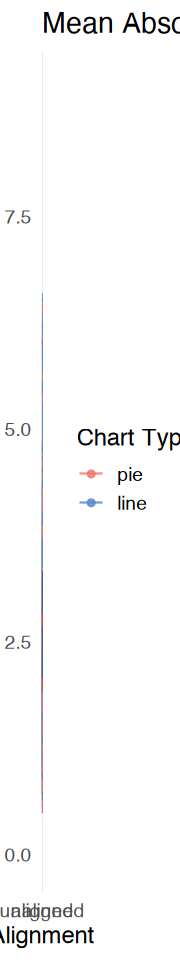

In [125]:
# Compute userMeans and overallMeans
userMeans <- data %>%
  group_by(userID, alignment, chartType) %>%
  summarise(meanAbsError = mean(absError, na.rm = TRUE), .groups = "drop")

overallMeans <- data %>%
  group_by(alignment, chartType) %>%
  summarise(overallMean = mean(absError, na.rm = TRUE), .groups = "drop")

# Plot
alignmentByChartPlot <- ggplot(userMeans, aes(x = alignment, y = meanAbsError,
                                               group = interaction(userID, chartType),
                                               color = chartType)) +
  coord_cartesian(ylim = c(0, 9)) +
  geom_line(alpha = 0.8) +
  geom_point(alpha = 0.8) +
  # overall mean lines
  geom_line(data = overallMeans,
            aes(x = alignment, y = overallMean, group = chartType),
            linewidth = 1.5,
            inherit.aes = FALSE,
            color = red) +  # pie overall mean in red
  geom_line(data = overallMeans %>% filter(chartType == "line"),
            aes(x = alignment, y = overallMean, group = chartType),
            linewidth = 1.5,
            inherit.aes = FALSE,
            color = blue) +  # line overall mean in blue
  # overall mean points
  geom_point(data = overallMeans %>% filter(chartType == "pie"),
             aes(x = alignment, y = overallMean),
             color = red, size = 3,
             inherit.aes = FALSE) +
  geom_point(data = overallMeans %>% filter(chartType == "line"),
             aes(x = alignment, y = overallMean),
             color = blue, size = 3,
             inherit.aes = FALSE) +
  scale_color_manual(values = c("line" = lightblue, "pie" = lightred)) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Mean Absolute Error per Alignment by Chart Type",
    x = "Alignment",
    y = "Mean Absolute Error",
    color = "Chart Type"
  )

alignmentByChartPlot

In [126]:
overallMeans

alignment,chartType,overallMean
<chr>,<fct>,<dbl>
aligned,pie,2.018397
aligned,line,2.162943
unaligned,pie,2.770132
unaligned,line,3.246448


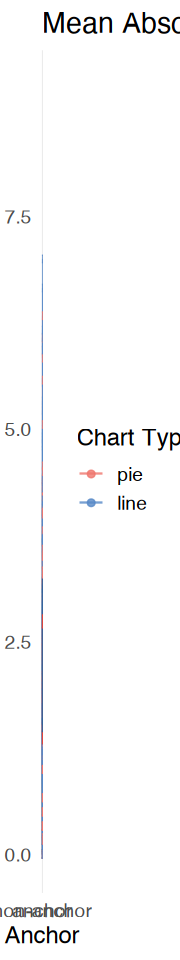

In [127]:
# Compute userMeans and overallMeans for anchor
userMeansAnchor <- data %>%
  group_by(userID, anchor, chartType) %>%
  summarise(meanAbsError = mean(absError, na.rm = TRUE), .groups = "drop")

overallMeansAnchor <- data %>%
  group_by(anchor, chartType) %>%
  summarise(overallMean = mean(absError, na.rm = TRUE), .groups = "drop")

# Plot
anchorByChartPlot <- ggplot(userMeansAnchor, aes(x = anchor, y = meanAbsError,
                                                  group = interaction(userID, chartType),
                                                  color = chartType)) +
  coord_cartesian(ylim = c(0, 9)) +
  geom_line(alpha = 0.8) +
  geom_point(alpha = 0.8) +
  # overall mean lines
  geom_line(data = overallMeansAnchor %>% filter(chartType == "pie"),
            aes(x = anchor, y = overallMean, group = chartType),
            linewidth = 1.5,
            inherit.aes = FALSE,
            color = red) +
  geom_line(data = overallMeansAnchor %>% filter(chartType == "line"),
            aes(x = anchor, y = overallMean, group = chartType),
            linewidth = 1.5,
            inherit.aes = FALSE,
            color = blue) +
  # overall mean points
  geom_point(data = overallMeansAnchor %>% filter(chartType == "pie"),
             aes(x = anchor, y = overallMean),
             color = red, size = 3,
             inherit.aes = FALSE) +
  geom_point(data = overallMeansAnchor %>% filter(chartType == "line"),
             aes(x = anchor, y = overallMean),
             color = blue, size = 3,
             inherit.aes = FALSE) +
  scale_color_manual(values = c("line" = lightblue, "pie" = lightred)) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Mean Absolute Error per Anchor by Chart Type",
    x = "Anchor",
    y = "Mean Absolute Error",
    color = "Chart Type"
  )

anchorByChartPlot
